## loghw
17.8.25

imports:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from math import log
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

first dataset:

Intercept (β₀): -1.19
Coefficient (β₁): 0.03
Logistic equation: P(hit 10k steps) = 1 / (1 + e^-(-1.19 + 0.03 * minutes))
Decision boundary: 61.24 minutes


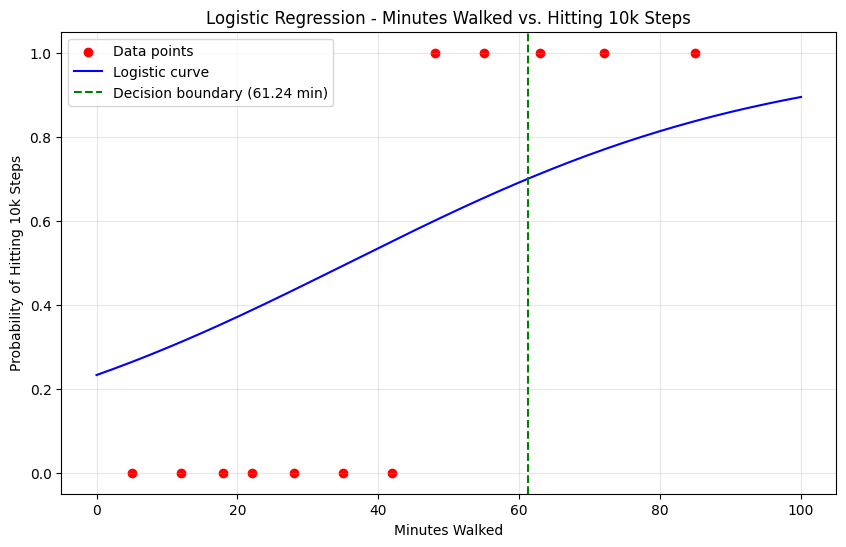


Predictions:
16 minutes: 0.34 probability of hitting 10k steps (Not yet)
27 minutes: 0.43 probability of hitting 10k steps (Not yet)
33 minutes: 0.48 probability of hitting 10k steps (Not yet)
49 minutes: 0.61 probability of hitting 10k steps (Not yet)
67 minutes: 0.74 probability of hitting 10k steps (Hit 10k)
90 minutes: 0.86 probability of hitting 10k steps (Hit 10k)

Confusion Matrix:
[[2 0]
 [0 1]]

Accuracy:  1.00
Precision: 1.00
Recall:    1.00
F1-score:  1.00


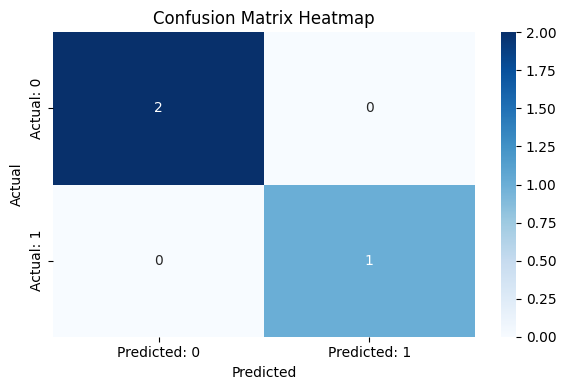

In [13]:

# Our data
minutes_walked = np.array([5, 12, 18, 22, 28, 35, 42, 48, 55, 63, 72, 85]).reshape(-1, 1)  # Minutes walked
hit_10k_steps = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Hit 10k steps (0=No, 1=Yes)

# 1) Split the dataset into train/test sets (70%/30%)
X_train, X_test_split, y_train, y_test_split = train_test_split(
    minutes_walked, hit_10k_steps, test_size=0.2, random_state=46
)

# Create logistic regression model
model = LogisticRegression(solver='liblinear')

# Fit the logistic regression model on the training set
model.fit(X_train, y_train)

# Use the test set to produce predictions
y_pred = model.predict(X_test_split)

# Print results
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")
print(f"Coefficient (β₁): {model.coef_[0][0]:.2f}")

# Calculate equation
equation = f"P(hit 10k steps) = 1 / (1 + e^-({model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f} * minutes))"
print(f"Logistic equation: {equation}")

# Helper: get boundary for any probability
def get_threshold(probability):
    logit = log(probability / (1 - probability))
    return (logit - b0) / b1

# Coefficients
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# Find decision boundary (probability = 0.7)
decision_boundary = get_threshold(0.7)
print(f"Decision boundary: {decision_boundary:.2f} minutes")

# Generate points for the logistic curve
x_test = np.linspace(0, 100, 200).reshape(-1, 1)
y_proba = model.predict_proba(x_test)[:, 1]

# Create the graph
plt.figure(figsize=(10, 6))
plt.scatter(minutes_walked, hit_10k_steps, color='red', marker='o', label='Data points')
plt.plot(x_test, y_proba, color='blue', label='Logistic curve')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label=f'Decision boundary ({decision_boundary:.2f} min)')

# Add labels and formatting
plt.title('Logistic Regression - Minutes Walked vs. Hitting 10k Steps')
plt.xlabel('Minutes Walked')
plt.ylabel('Probability of Hitting 10k Steps')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()

# Make predictions for specific minutes
print("\nPredictions:")
for minutes in [16, 27, 33, 49, 67, 90]:
    probability = 1 / (1 + np.exp(-(model.intercept_[0] + model.coef_[0][0] * minutes)))
    outcome = "Hit 10k" if probability >= 0.7 else "Not yet"
    print(f"{minutes} minutes: {probability:.2f} probability of hitting 10k steps ({outcome})")

# 4) Compute and display the following metrics:
cm = confusion_matrix(y_test_split, y_pred)
print("\nConfusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred)
recall = recall_score(y_test_split, y_pred)
f1 = f1_score(y_test_split, y_pred)

print(f"\nAccuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")

# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted: 0", "Predicted: 1"],
            yticklabels=["Actual: 0", "Actual: 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()


second dataset

In [16]:
# Data: [x1 (study hours/week), x2 (sleep hours/night)]
X = np.array([
    [2, 5.0],
    [3, 5.5],
    [4, 5.0],
    [4, 6.0],
    [5, 5.5],
    [5, 6.5],
    [6, 6.0],
    [6, 7.0],
    [7, 6.5],
    [7, 7.5],
    [8, 6.0],
    [8, 7.0],
    [9, 7.0],
    [10, 7.5]
])

# Target: passed mock exam (1=yes, 0=no)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Fit logistic regression model (solver='liblinear') using [x1, x2]
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

# Print intercept_ and all entries of coef_ (one row with [β1, β2])
b0 = model.intercept_[0]
b1, b2 = model.coef_[0]
print("Intercept (b0):", b0)
print("Coefficients (b1, b2):", b1, b2)

# Write the regression equation
print("\nLogistic regression equation:")
print(f"P(pass=1) = 1 / (1 + e^-({b0:.4f} + {b1:.4f}*x1 + {b2:.4f}*x2))")

# Predicted probability for the point [x1, x2] = [6.5, 7.5]
new_point = np.array([[6.5, 7.5]])
prob = model.predict_proba(new_point)[0, 1]
print(f"\nPredicted probability of passing for [x1,x2]=[6.5,7.5]: {prob:.4f}")


Intercept (b0): -0.44427259781707773
Coefficients (b1, b2): 1.1133932887535782 -0.8699979324441998

Logistic regression equation:
P(pass=1) = 1 / (1 + e^-(-0.4443 + 1.1134*x1 + -0.8700*x2))

Predicted probability of passing for [x1,x2]=[6.5,7.5]: 0.5666
